# Analyzing Employee Attrition and Factors Influencing Workplace Retention: A Comprehensive Study
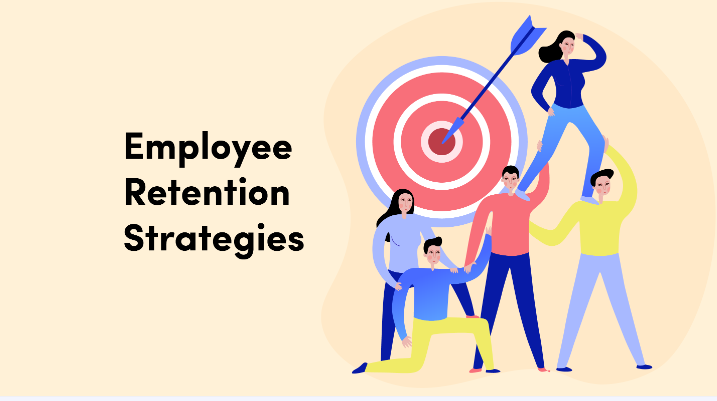

The HR dataset is a collection of employee-related information that is commonly used for HR analytics and decision-making. The dataset contains various attributes that provide insights into employee characteristics, job roles, and potential attrition factors. Here's a short summary of the dataset.  
The HR dataset comprises the following key features:

- **`Age`**: The age of the employee.
- **`Attrition`**: A categorical variable indicating whether the employee has left the company ("Yes") or not ("No").
- **`BusinessTravel`**: The frequency of business travel, categorized as "Travel Rarely," "Travel Frequently," or "Non-Travel."
- **`Department`**: The department in which the employee works, such as "Research & Development," "Human Resources," or "Sales."
- **`DistanceFromHome`**: The distance between the employee's home and workplace.
- **`Education`**: A categorical variable representing the employee's level of education, ranging from 1 (lowest) to 5 (highest).
- **`Gender`**: The gender of the employee.
- **`MonthlyIncome`**: The monthly income earned by the employee.
- **`NumCompaniesWorked`**: The number of companies the employee has worked for before joining the current company.
- **`PercentSalaryHike`**: The percentage increase in salary during the last salary hike.
- **`TotalWorkingYears`**: The total number of years the employee has worked.
- **`YearsAtCompany`**: The number of years the employee has worked at the current company.
- **`YearsSinceLastPromotion`**: The number of years since the employee's last promotion.
- **`YearsWithCurrentManager`**: The number of years the employee has worked under the current manager.

The dataset's primary focus is on understanding factors that might contribute to employee attrition. By analyzing the relationships and trends within the dataset, organizations can gain valuable insights into potential attrition drivers, such as age, job satisfaction, career progression, and more. This information can then be used to implement strategies aimed at reducing attrition and improving overall employee retention and satisfaction.

In [15]:
import os
os.getcwd()

'C:\\Users\\Shubham Soni\\Videos\\Probability Basics and Probability Distributions-20230807\\Project\\Hr'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# data's shape
data.shape

(1470, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Exploratory Data Analysis (EDA)
EDA helps us understand the dataset's structure and characteristics. We'll analyze various aspects of the data.

In [5]:
# Summary statistics of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [6]:
# Count of unique values in categorical columns
categorical_data = data.select_dtypes(include=["object"])
numerical_data = data.select_dtypes(exclude = ["object"])
# categorical_data

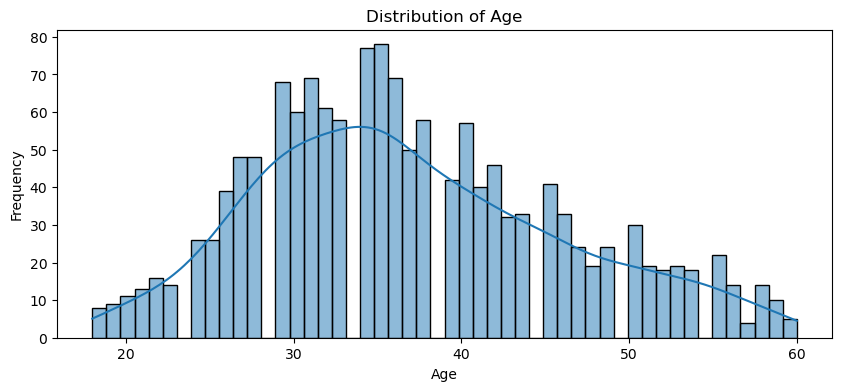

In [10]:
# Visualizing distribution of Age
plt.figure(figsize=(10, 4))
sns.histplot(data["Age"], bins=50, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

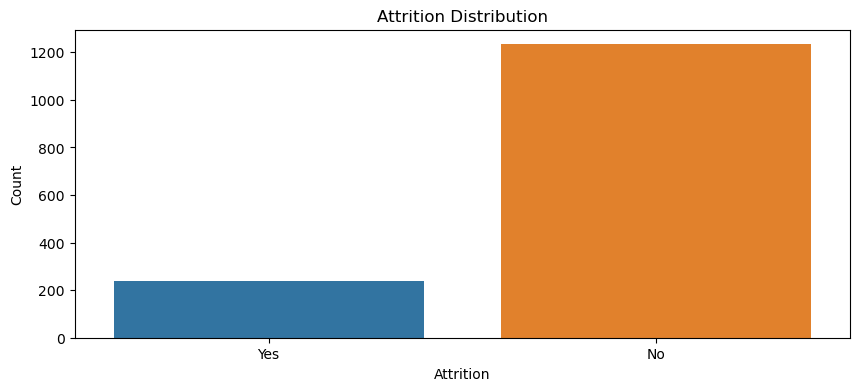

In [11]:
# Visualizing Attrition
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x="Attrition")
plt.title("Attrition Distribution")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

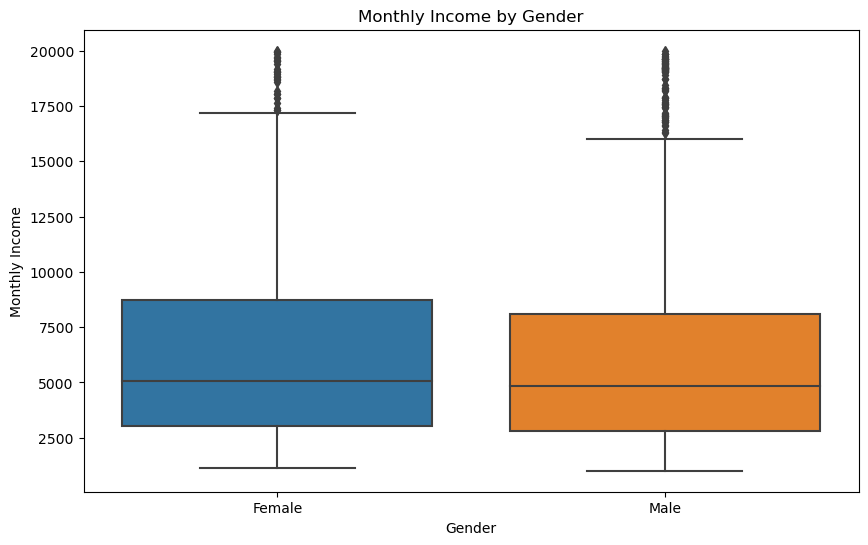

In [12]:
# Visualizing Monthly Income by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Gender", y="MonthlyIncome")
plt.title("Monthly Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Monthly Income")
plt.show()

## Hypothesis Testing:

Let's perform a hypothesis test to see if there's a significant difference in Monthly Income based on Attrition.

In [28]:
from scipy.stats import ttest_ind

attrition_yes = data[data["Attrition"] == "Yes"]["MonthlyIncome"]
attrition_no = data[data["Attrition"] == "No"]["MonthlyIncome"]

In [29]:
t_stat, p_value = ttest_ind(attrition_yes, attrition_no)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -6.203935765608938
P-Value: 7.14736398535381e-10


In [30]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Monthly Income differs based on Attrition.")
else:
    print("Fail to reject the null hypothesis: Monthly Income does not differ based on Attrition.")

Reject the null hypothesis: Monthly Income differs based on Attrition.


## Correlation Analysis:

Let's analyze the correlation between numerical variables using a correlation heatmap.

C:\Users\Shubham Soni\AppData\Local\Temp\ipykernel_15120\1578366088.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="coolwarm", center=0)


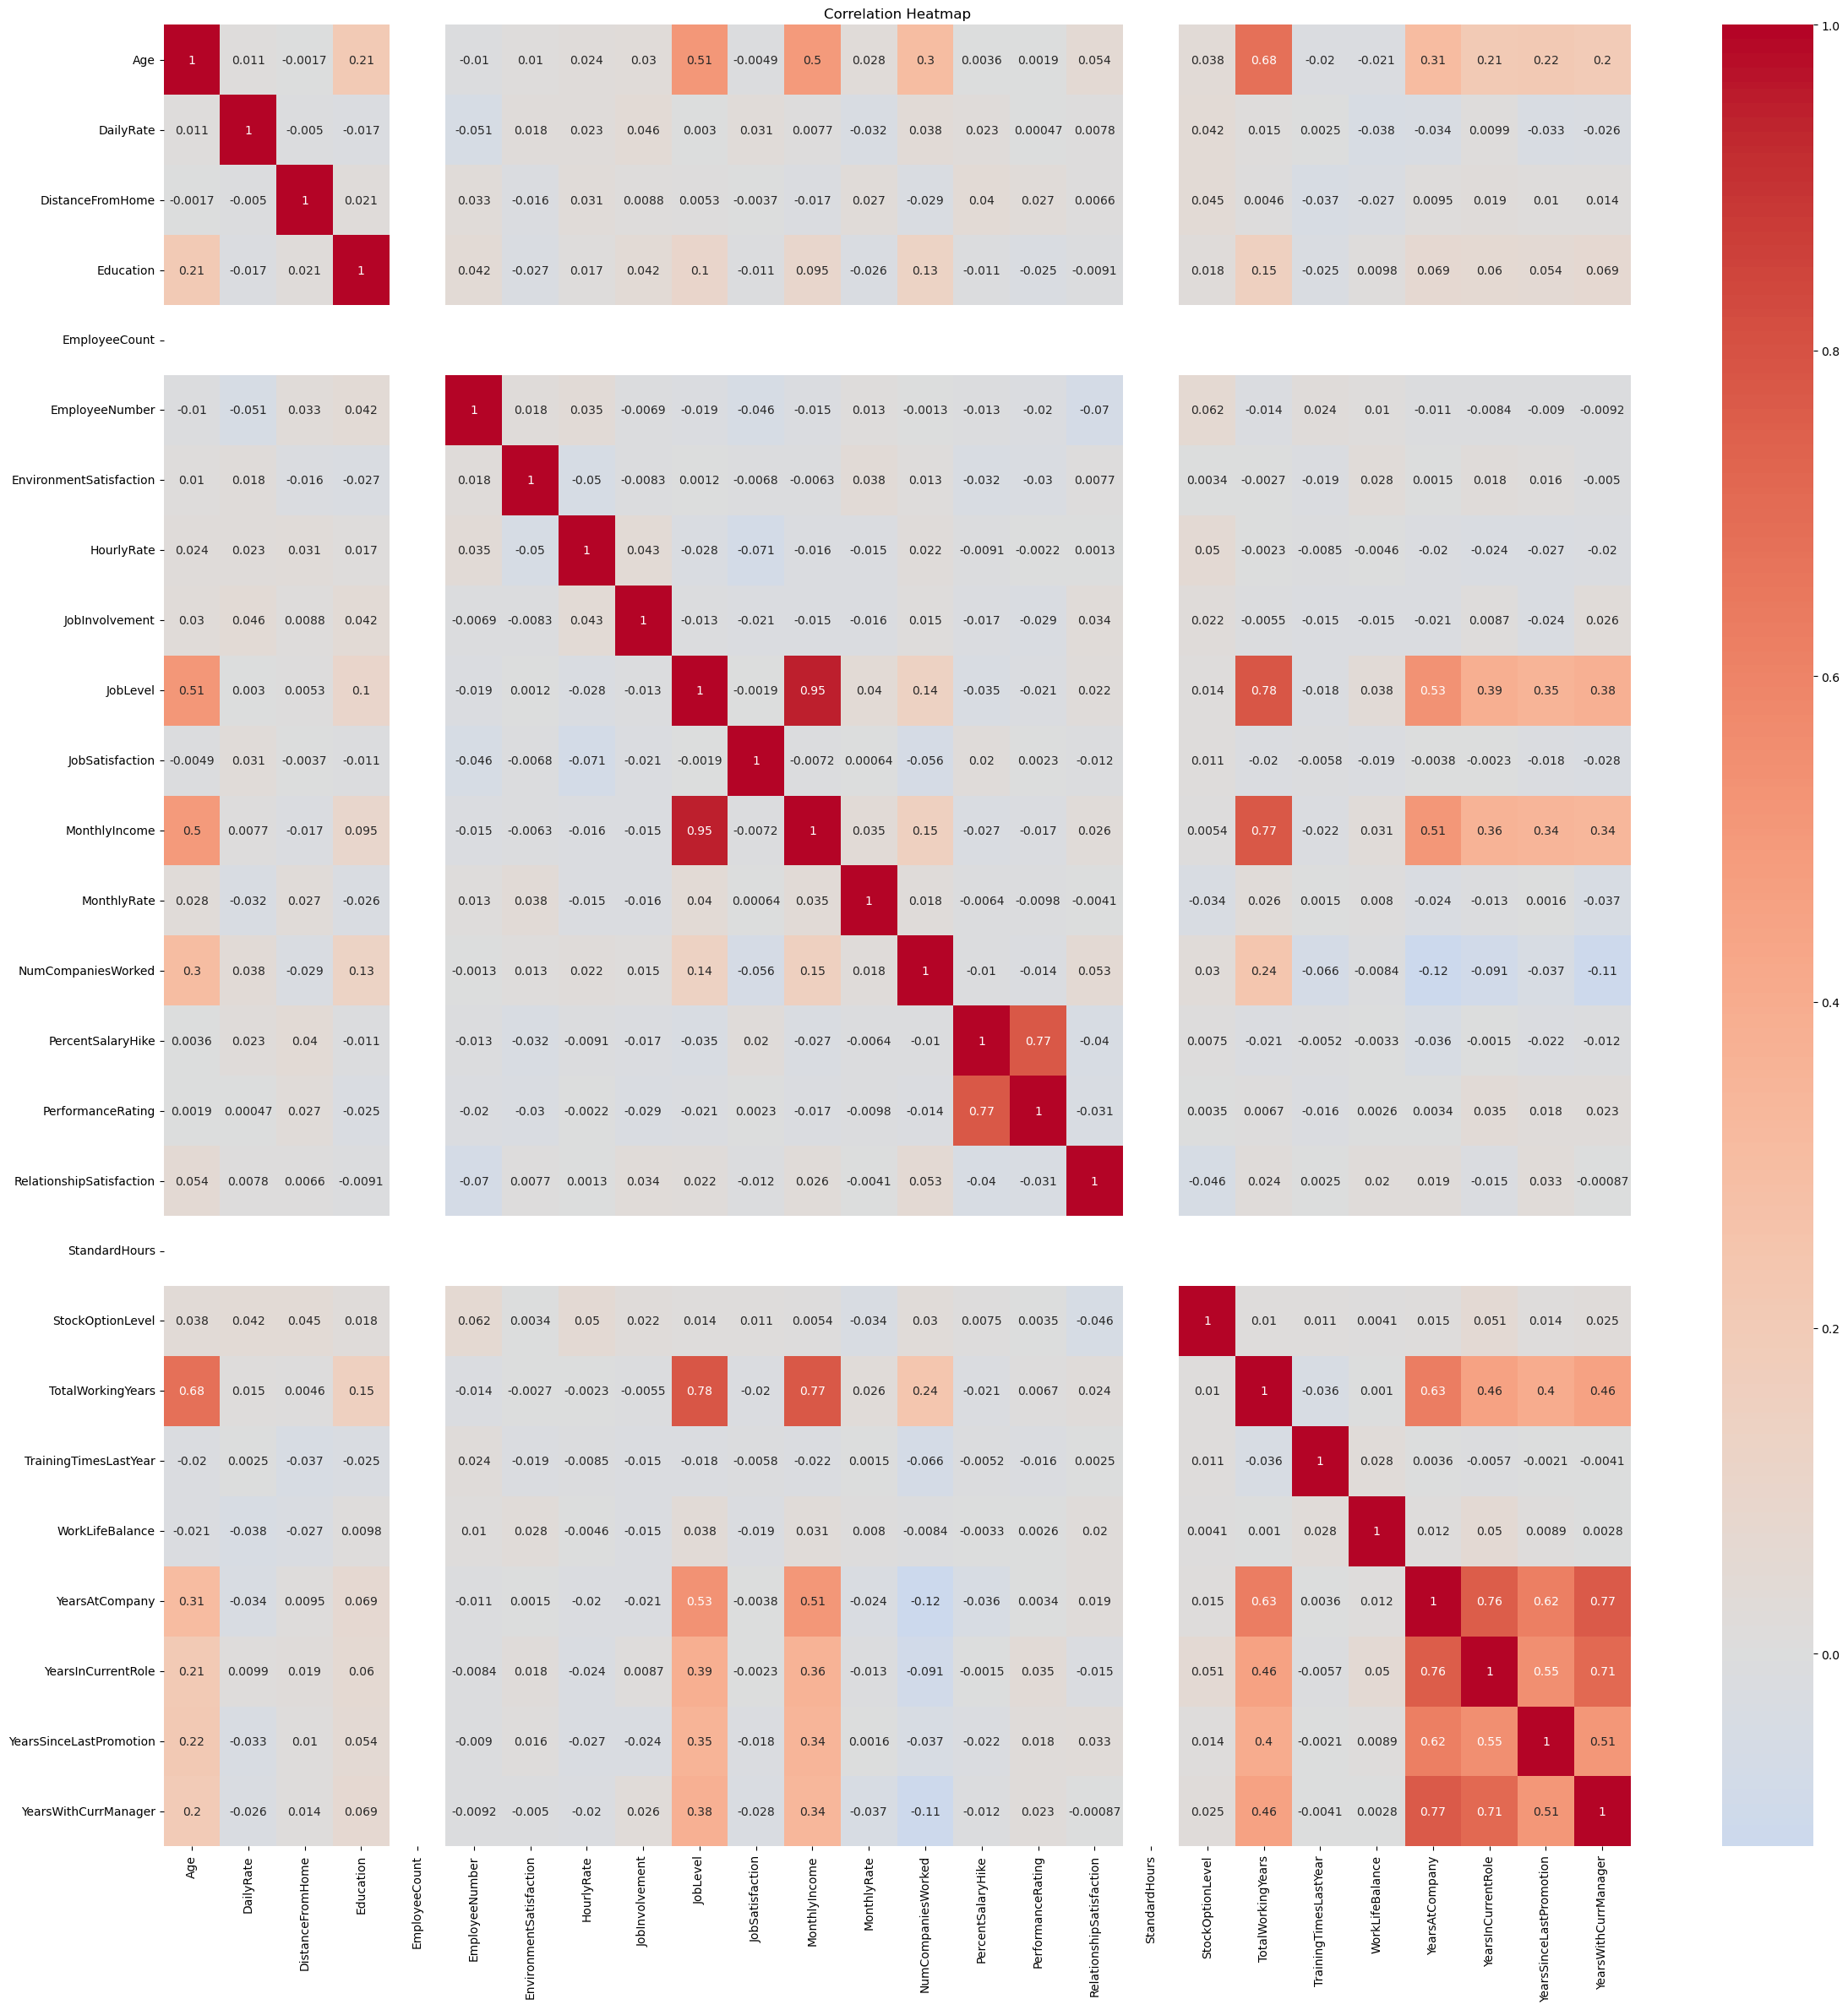

In [35]:
plt.figure(figsize=(28, 28))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

### Feature Importance:

We can use a decision tree-based model to estimate feature importance.

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data for modeling  
data_encoded = pd.get_dummies(data.drop("Attrition", axis=1))
data_encoded


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,0,0,0,0,0,1,0,1,1,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,1,0,1,1,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,0,0,0,1,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,1,0,0,1,0,1,1,0


In [37]:
X = data_encoded.drop("MonthlyIncome", axis=1)
y = data["MonthlyIncome"]
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,0,0,0,0,0,1,0,1,1,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,1,0,1,1,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,0,0,0,1,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,1,0,0,1,0,1,1,0


In [38]:
y

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

In [39]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)


RandomForestClassifier(random_state=42)

In [42]:
# Feature importance
feature_importance = rf_model.feature_importances_
feature_importance

array([0.04856402, 0.05351179, 0.04275827, 0.02685271, 0.        ,
       0.05376797, 0.02477331, 0.04959056, 0.02281831, 0.01819073,
       0.02464218, 0.05458519, 0.03285568, 0.03810465, 0.00803368,
       0.0248817 , 0.        , 0.02161774, 0.0420352 , 0.03121833,
       0.02323072, 0.03870817, 0.03353991, 0.02841279, 0.03370676,
       0.00834297, 0.00953609, 0.01008419, 0.00351409, 0.00735776,
       0.00721101, 0.00200202, 0.01194257, 0.00626829, 0.01168593,
       0.00592287, 0.00765154, 0.01245194, 0.01165807, 0.00617979,
       0.00259906, 0.00833464, 0.00438243, 0.00685173, 0.00429203,
       0.00824992, 0.00620523, 0.00402164, 0.01079021, 0.01243293,
       0.01134876, 0.        , 0.01111292, 0.01116901])

In [41]:
feature_names = X.columns
feature_names

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Re

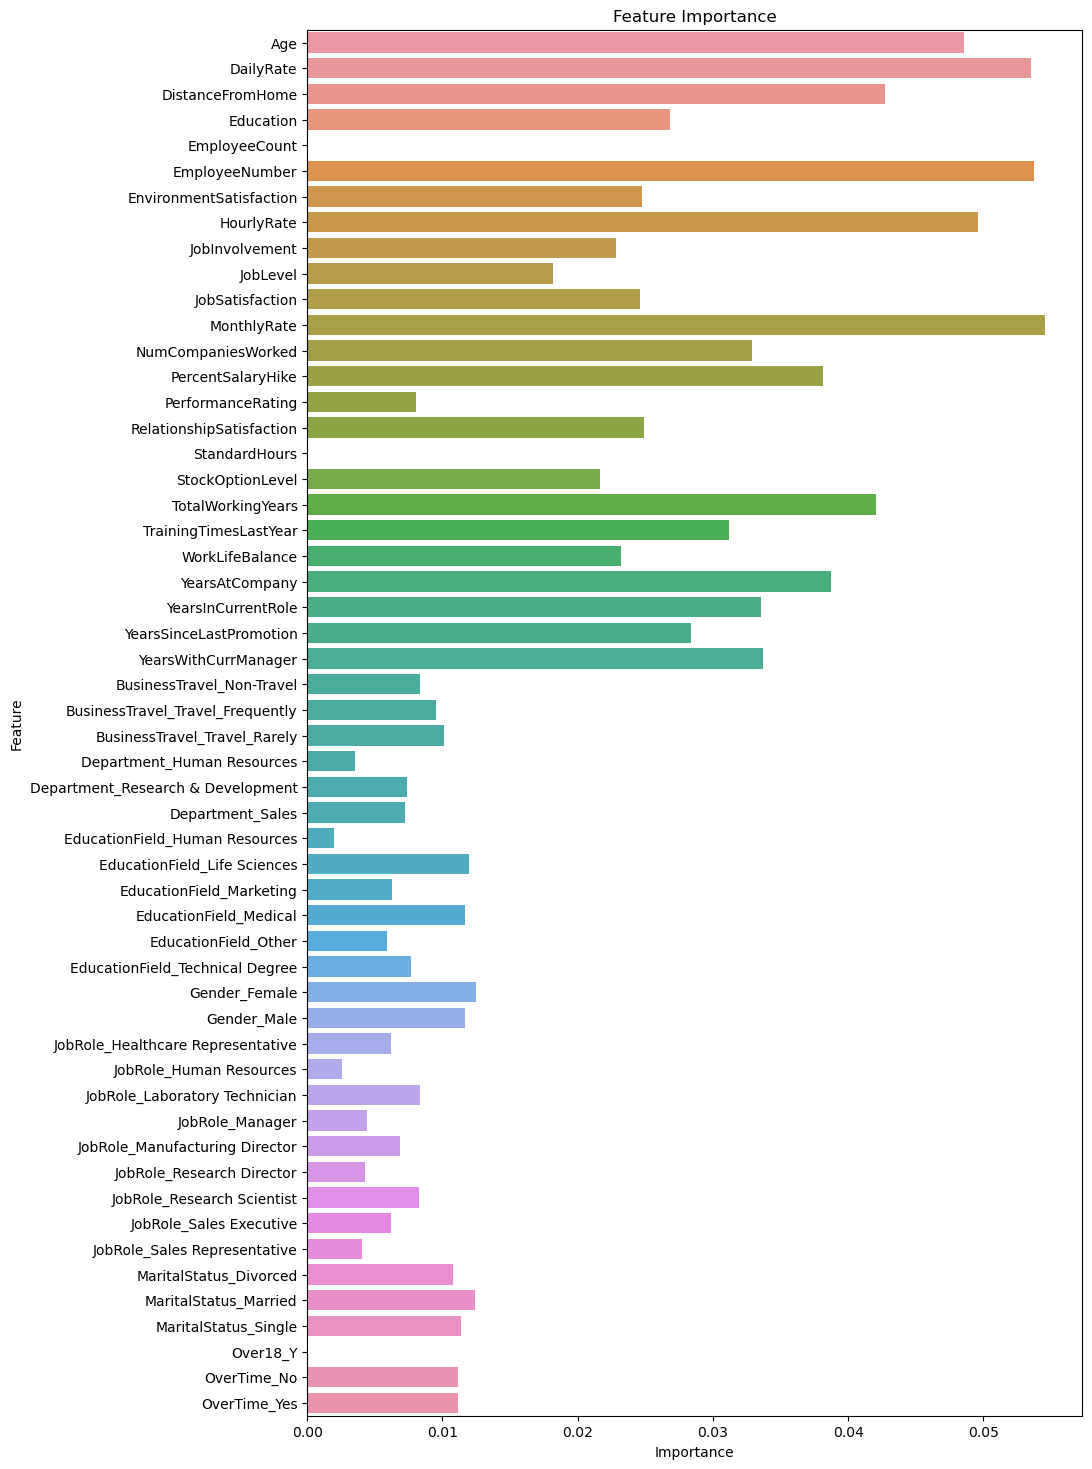

In [55]:
# Visualize feature importance
plt.figure(figsize=(10, 18))
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Predictive Modeling:

Let's build a model to predict Attrition using various features.

In [57]:
X.shape, y.shape

((1470, 56), (1470,))

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare data for modeling
data_encoded = pd.get_dummies(data)
X = data_encoded.drop("Attrition_Yes", axis=1)
y = data_encoded["Attrition_Yes"]`

In [46]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [52]:
y_pred_train = rf_classifier.predict(X_train)
confusion_matrix(y_train, y_pred_train)

array([[978,   0],
       [  0, 198]], dtype=int64)

In [49]:
print(f"Accuracy: {accuracy}")zxxzc
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Confusion Matrix:
[[255   0]
 [  0  39]]


In [51]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        39

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

